Loading libraries

In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

PATH =  "/home/jmurga/mkt/201902/"
import sys
sys.path.insert(0, PATH + '/scripts/src/')
from mkt_analysis import *

In [2]:
%load_ext rpy2.ipython

# Estimating $\alpha$ for each simulated scenario

In [3]:
scenario = np.array(["2nes_neg_1000","2nes_neg_500","2nes_pos_100","2nes_pos_500","alpha_0.1","alpha_0.7","base","genes_1k","genes_28k","rho_0.0001","rho_0.01","shape_0.1","shape_0.2","theta_0.0001","theta_0.01","base_weakly","base_weakly_bgs"])

In [3]:
nthreads = 20
for s in scenario:
    parse_bootstrap_pol_div(PATH + "/raw_data/simulations/" + s,20,nthreads)
    alpha, plot, error, p = mkt_on_simulated_data(PATH + "raw_data/simulations/" + s,nthreads)
    pkl.dump([alpha,plot,error], open(PATH + "results/simulations/" + s + ".pkl", "wb" ))

100%|██████████| 100/100 [00:00<00:00, 118.91it/s]


# Output

Subset simulation tables

In [4]:
results = glob.glob(PATH + '/results/simulations/*pkl')
data_plot = []; error = []
for i in results:
    f = pkl.load(open(i,'rb'))
    data_plot.append(f[1])
    error.append(f[0])

data_plot = pd.concat(data_plot)
error    = pd.concat(error)

## Tables

In [5]:
mean_error = error.groupby(['simulation']).mean().reset_index()
mean_error

,simulation,std,emkt1,emkt2,emkt3,emkt4,fww1,fww2,fww3,fww4,imp1,imp2,imp3,imp4,asymp1,asymp2,grapes,trueAlpha
0,2nes_neg_1000,-0.33297,-0.13654,-0.12317,-0.20110,-0.20110,-0.07194,0.14012,0.17611,0.22204,-0.07194,0.14012,0.17611,0.22204,0.245010,0.227120,0.35033,0.30134
1,2nes_neg_500,-0.42676,-0.22212,-0.21410,-0.28203,-0.28203,-0.15418,0.06121,0.12985,0.19029,-0.15418,0.06121,0.12985,0.19029,0.275150,0.300480,0.29927,0.27098
2,2nes_pos_100,-0.63556,-0.38950,-0.36980,-0.46287,-0.46287,-0.31094,-0.04992,0.01742,0.05411,-0.31094,-0.04992,0.01742,0.05411,0.068730,0.102590,0.20528,0.17597
3,2nes_pos_500,0.03345,0.18053,0.17616,0.12110,0.12110,0.23543,0.38221,0.42230,0.44226,0.23543,0.38221,0.42230,0.44226,0.443890,0.457700,0.53768,0.48431
4,alpha_0.1,-0.82138,-0.54880,-0.53563,-0.61898,-0.61898,-0.46271,-0.19770,-0.07758,-0.00669,-0.46271,-0.19770,-0.07758,-0.00669,0.062310,0.066180,0.11779,0.08005
5,alpha_0.7,0.31648,0.41385,0.40839,0.37211,0.37211,0.45026,0.54683,0.57045,0.58890,0.45026,0.54683,0.57045,0.58890,0.593850,0.602590,0.65704,0.62945
6,base,-0.28231,-0.08507,-0.08776,-0.16137,-0.16137,-0.01873,0.16629,0.22817,0.24924,-0.01873,0.16629,0.22817,0.24924,0.229460,0.244840,0.38080,0.35546
7,base_weakly,-0.26098,-0.07676,-0.06827,-0.13360,-0.13360,-0.01891,0.16364,0.20336,0.26991,-0.01891,0.16364,0.20336,0.26991,0.294620,0.345043,0.43360,0.40996
8,base_weakly_bgs,-0.86577,-0.61462,-0.56021,-0.65354,-0.65354,-0.51467,-0.15915,-0.06297,-0.00326,-0.51467,-0.15915,-0.06297,-0.00326,-0.101224,-0.095708,0.26667,0.16145
9,genes_1k,-0.24281,-0.03980,-0.01436,-0.10470,-0.10470,0.02106,0.23839,0.25922,0.28325,0.02106,0.23839,0.25922,0.28325,0.276000,0.322011,0.42466,0.34591


In [6]:
mean_error.columns

Index(['simulation', 'std', 'emkt1', 'emkt2', 'emkt3', 'emkt4', 'fww1', 'fww2',
       'fww3', 'fww4', 'imp1', 'imp2', 'imp3', 'imp4', 'asymp1', 'asymp2',
       'grapes', 'trueAlpha'],
      dtype='object')

In [7]:
mean_error.loc[:,['simulation', 'std', 'emkt1','emkt2', 'emkt3', 'emkt4', 'fww1', 'fww2', 'fww3', 'fww4', 'imp1', 'imp2', 'imp3', 'imp4', 'asymp1','asymp2', 'grapes', 'trueAlpha']]

,simulation,std,emkt1,emkt2,emkt3,emkt4,fww1,fww2,fww3,fww4,imp1,imp2,imp3,imp4,asymp1,asymp2,grapes,trueAlpha
0,2nes_neg_1000,-0.33297,-0.13654,-0.12317,-0.20110,-0.20110,-0.07194,0.14012,0.17611,0.22204,-0.07194,0.14012,0.17611,0.22204,0.245010,0.227120,0.35033,0.30134
1,2nes_neg_500,-0.42676,-0.22212,-0.21410,-0.28203,-0.28203,-0.15418,0.06121,0.12985,0.19029,-0.15418,0.06121,0.12985,0.19029,0.275150,0.300480,0.29927,0.27098
2,2nes_pos_100,-0.63556,-0.38950,-0.36980,-0.46287,-0.46287,-0.31094,-0.04992,0.01742,0.05411,-0.31094,-0.04992,0.01742,0.05411,0.068730,0.102590,0.20528,0.17597
3,2nes_pos_500,0.03345,0.18053,0.17616,0.12110,0.12110,0.23543,0.38221,0.42230,0.44226,0.23543,0.38221,0.42230,0.44226,0.443890,0.457700,0.53768,0.48431
4,alpha_0.1,-0.82138,-0.54880,-0.53563,-0.61898,-0.61898,-0.46271,-0.19770,-0.07758,-0.00669,-0.46271,-0.19770,-0.07758,-0.00669,0.062310,0.066180,0.11779,0.08005
5,alpha_0.7,0.31648,0.41385,0.40839,0.37211,0.37211,0.45026,0.54683,0.57045,0.58890,0.45026,0.54683,0.57045,0.58890,0.593850,0.602590,0.65704,0.62945
6,base,-0.28231,-0.08507,-0.08776,-0.16137,-0.16137,-0.01873,0.16629,0.22817,0.24924,-0.01873,0.16629,0.22817,0.24924,0.229460,0.244840,0.38080,0.35546
7,base_weakly,-0.26098,-0.07676,-0.06827,-0.13360,-0.13360,-0.01891,0.16364,0.20336,0.26991,-0.01891,0.16364,0.20336,0.26991,0.294620,0.345043,0.43360,0.40996
8,base_weakly_bgs,-0.86577,-0.61462,-0.56021,-0.65354,-0.65354,-0.51467,-0.15915,-0.06297,-0.00326,-0.51467,-0.15915,-0.06297,-0.00326,-0.101224,-0.095708,0.26667,0.16145
9,genes_1k,-0.24281,-0.03980,-0.01436,-0.10470,-0.10470,0.02106,0.23839,0.25922,0.28325,0.02106,0.23839,0.25922,0.28325,0.276000,0.322011,0.42466,0.34591


In [8]:
mean_error.to_csv(PATH + "/results/simulations/mean_alphas.tsv",sep='\t',index=False,float_format='%.3f')

In [9]:
df_error = pd.concat([mean_error['simulation'],mean_error.loc[:,['std', 'emkt1','emkt2', 'emkt3', 'emkt4', 'fww1', 'fww2', 'fww3','fww4', 'imp1', 'imp2', 'imp3','imp4', 'asymp2', 'grapes']].apply(lambda row: np.abs(mean_error['trueAlpha'] - row ))],axis=1)

#df_error = df_error[(df_error.simulation != 'base_weakly') & (df_error.simulation != 'base_weakly_bgs') ]
df_error 

,simulation,std,emkt1,emkt2,emkt3,emkt4,fww1,fww2,fww3,fww4,imp1,imp2,imp3,imp4,asymp2,grapes
0,2nes_neg_1000,0.63431,0.43788,0.42451,0.50244,0.50244,0.37328,0.16122,0.12523,0.07930,0.37328,0.16122,0.12523,0.07930,0.074220,0.04899
1,2nes_neg_500,0.69774,0.49310,0.48508,0.55301,0.55301,0.42516,0.20977,0.14113,0.08069,0.42516,0.20977,0.14113,0.08069,0.029500,0.02829
2,2nes_pos_100,0.81153,0.56547,0.54577,0.63884,0.63884,0.48691,0.22589,0.15855,0.12186,0.48691,0.22589,0.15855,0.12186,0.073380,0.02931
3,2nes_pos_500,0.45086,0.30378,0.30815,0.36321,0.36321,0.24888,0.10210,0.06201,0.04205,0.24888,0.10210,0.06201,0.04205,0.026610,0.05337
4,alpha_0.1,0.90143,0.62885,0.61568,0.69903,0.69903,0.54276,0.27775,0.15763,0.08674,0.54276,0.27775,0.15763,0.08674,0.013870,0.03774
5,alpha_0.7,0.31297,0.21560,0.22106,0.25734,0.25734,0.17919,0.08262,0.05900,0.04055,0.17919,0.08262,0.05900,0.04055,0.026860,0.02759
6,base,0.63777,0.44053,0.44322,0.51683,0.51683,0.37419,0.18917,0.12729,0.10622,0.37419,0.18917,0.12729,0.10622,0.110620,0.02534
7,base_weakly,0.67094,0.48672,0.47823,0.54356,0.54356,0.42887,0.24632,0.20660,0.14005,0.42887,0.24632,0.20660,0.14005,0.064917,0.02364
8,base_weakly_bgs,1.02722,0.77607,0.72166,0.81499,0.81499,0.67612,0.32060,0.22442,0.16471,0.67612,0.32060,0.22442,0.16471,0.257158,0.10522
9,genes_1k,0.58872,0.38571,0.36027,0.45061,0.45061,0.32485,0.10752,0.08669,0.06266,0.32485,0.10752,0.08669,0.06266,0.023899,0.07875


In [10]:
df_error.columns = ['Simulations','MKT','eMKT 0.05','eMKT 0.15','eMKT 0.25','eMKT 0.35','fwwMKT 0.05','fwwMKT 0.15','fwwMKT 0.25','fwwMKT 0.35','impMKT 0.05','impMKT 0.15','impMKT 0.25','impMKT 0.35','aMKT','Grapes']

df_error.Simulations = ["2Nes- = 1000","2Nes- = 500","2Nes+ = 100","2Nes+ = 500","α = 0.1","α = 0.7","Base","base_weakly","base_weakly_bgs","Genes = 2k","Genes = 28k","ρ = 0.0001","ρ =  0.01","Shape = 0.1","Shape = 0.2","θ = 0.0001","θ = 0.01"]

df_error.Simulations
df_error = df_error.round(3)

In [11]:
df_error.to_csv(PATH + "/results/simulations/mean_alphas_error.tsv",sep='\t',index=False,float_format='%.3f')

In [12]:
error_count = error.groupby(['simulation']).apply(lambda r: r.isna().sum()).loc[:,['std', 'emkt1','emkt2', 'emkt3','emkt4', 'fww1', 'fww2', 'fww3','fww4', 'imp1', 'imp2', 'imp3','imp4', 'asymp2', 'grapes']].reset_index()
error_count

,simulation,std,emkt1,emkt2,emkt3,emkt4,fww1,fww2,fww3,fww4,imp1,imp2,imp3,imp4,asymp2,grapes
0,2nes_neg_1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2nes_neg_500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2nes_pos_100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2nes_pos_500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,alpha_0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,alpha_0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,base,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,base_weakly,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
8,base_weakly_bgs,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0
9,genes_1k,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0


In [13]:
error_count.columns = ['Simulations','MKT','eMKT 0.05','eMKT 0.15','eMKT 0.25','eMKT 0.35','fwwMKT 0.05','fwwMKT 0.15','fwwMKT 0.25','fwwMKT 0.35','impMKT 0.05','impMKT 0.15','impMKT 0.25','impMKT 0.35','aMKT','Grapes']

error_count.Simulations = ["2Nes- = 1000","2Nes- = 500","2Nes+ = 100","2Nes+ = 500","α = 0.1","α = 0.7","Base","base_weakly","base_weakly_bgs","Genes = 1k","Genes = 28k","ρ = 0.0001","ρ =  0.01","Shape = 0.1","Shape = 0.2","θ = 0.0001","θ = 0.01"]

error_count = error_count.round(3)
error_count.iloc[:,1:]=(100 - error_count.iloc[:,1:] )/100

In [14]:
mkt_std = error.groupby('simulation').apply(lambda x: x.std()).reset_index()
mkt_std = pd.melt(mkt_std,id_vars='simulation')

mkt_std.simulation = pd.Categorical(mkt_std.simulation,categories=['base','2nes_neg_1000','2nes_neg_500','2nes_pos_500','2nes_pos_100','genes_1k','genes_28k', 'rho_0.0001','rho_0.01','shape_0.1','shape_0.2','theta_0.0001','theta_0.01', 'alpha_0.1', 'alpha_0.7','base_weakly','base_weakly_bgs'],ordered=True)


mkt_std.variable = pd.Categorical(mkt_std.variable,categories=['std','emkt1','emkt2','emkt3','emkt4','fww1','fww2'
,'fww3','fww4','imp1','imp2','imp3','imp4','asymp1','asymp2','grapes','trueAlpha'],ordered=True)

/tmp/ipykernel_150308/2910319800.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [15]:
tmp = pd.pivot_table(mkt_std,index='simulation',values='value',columns='variable');tmp

variable,std,emkt1,emkt2,emkt3,emkt4,fww1,fww2,fww3,fww4,imp1,imp2,imp3,imp4,asymp1,asymp2,grapes,trueAlpha
simulation,,,,,,,,,,,,,,,,,
base,0.025247,0.022397,0.023105,0.024543,0.024543,0.021692,0.022123,0.023928,0.028148,0.021692,0.022123,0.023928,0.028148,0.038914,0.044821,0.018441,0.007504
2nes_neg_1000,0.026426,0.024666,0.024318,0.025161,0.025161,0.024434,0.024248,0.026272,0.027124,0.024434,0.024248,0.026272,0.027124,0.039412,0.036352,0.021856,0.005772
2nes_neg_500,0.025394,0.023072,0.021715,0.022740,0.022740,0.022754,0.019744,0.021962,0.022765,0.022754,0.019744,0.021962,0.022765,0.038614,0.041655,0.018922,0.005320
2nes_pos_500,0.020125,0.018760,0.018102,0.019035,0.019035,0.018658,0.017467,0.019120,0.021671,0.018658,0.017467,0.019120,0.021671,0.033393,0.032721,0.015529,0.006683
2nes_pos_100,0.040651,0.035031,0.036173,0.036874,0.036874,0.033597,0.033658,0.034730,0.033793,0.033597,0.033658,0.034730,0.033793,0.044611,0.045211,0.027279,0.006802
genes_1k,0.072651,0.064733,0.063006,0.066723,0.066723,0.062899,0.055927,0.058890,0.060754,0.062899,0.055927,0.058890,0.060754,0.110542,0.107090,0.048028,0.019737
genes_28k,0.016972,0.015378,0.015149,0.016103,0.016103,0.015040,0.015100,0.016580,0.019271,0.015040,0.015100,0.016580,0.019271,0.028634,0.030675,0.012984,0.004547
rho_0.0001,0.028137,0.024933,0.024499,0.026135,0.026135,0.024227,0.022352,0.025241,0.026301,0.024227,0.022352,0.025241,0.026301,0.035430,0.043012,0.020339,0.006463
rho_0.01,0.026833,0.023455,0.024018,0.025071,0.025071,0.022716,0.022411,0.023256,0.025136,0.022716,0.022411,0.023256,0.025136,0.036335,0.039503,0.018501,0.007017


In [16]:
tmp.to_csv(PATH + "/results/simulations/mkt_std.tsv",sep='\t',float_format='%.5f')

## Plot

Transform columns to categorical data and rename it before continue

In [17]:
data_plot.simulation = pd.Categorical(data_plot.simulation,categories=['genes_1k', 'base_weakly_bgs', 'rho_0.01', '2nes_pos_100', 'base','theta_0.01', 'shape_0.1', 'alpha_0.7', 'alpha_0.1','2nes_neg_1000', 'rho_0.0001', 'alpha_0.25', 'theta_0.0001','shape_0.2', '2nes_pos_500', 'genes_28k', '2nes_neg_500','base_weakly'],ordered=True)

In [18]:
data_plot.variable = pd.Categorical(data_plot.variable, categories=['std','emkt1','emkt2','emkt3','emkt4','fww1','fww2','fww3','fww4','imp1','imp2','imp3','imp4','asymp2','grapes','trueAlpha'],ordered=True)

In [19]:
data_plot.simulation = data_plot.simulation.cat.rename_categories({'base': 'Baseline','rho_0.01':'ρ = 0.01','rho_0.0001':'ρ = 0.0001','theta_0.01':'θ = 0.01','theta_0.0001':'θ = 0.0001','genes_28k':'28k genes','genes_1k':'2k genes','2nes_pos_500':'2Nes+ = 500','2nes_pos_100':'2Nes+ = 100','2nes_neg_1000':'2Nes- = -1000','2nes_neg_500':'2Nes- = -500','shape_0.1':'β = 0.1','shape_0.2':'β = 0.2','alpha_0.7':'α = 0.7','alpha_0.25':'α = 0.25','alpha_0.1':'α = 0.1'})

In [20]:
data_plot.variable = data_plot.variable.cat.rename_categories({'std':'MKT','emkt1': 'eMKT 0.05','emkt2': 'eMKT 0.15','emkt3': 'eMKT 0.25','emkt4':'eMKT 0.35','fww1': 'fwwMKT 0.05','fww2': 'fwwMKT 0.15','fww3': 'fwwMKT 0.25','fww4': 'fwwMKT 0.35','imp1': 'impMKT 0.05','imp2': 'impMKT 0.15','imp3': 'impMKT 0.25','imp4': 'impMKT 0.35','asymp2':'aMKT','grapes':'Grapes','trueAlpha': 'True α'})

### Plotting all simulated scenarios

In [21]:
%%R -i data_plot -i PATH

options(repr.plot.width = 1000, repr.plot.height = 1000, repr.plot.res = 1000)

library(cowplot)
library(gridExtra)
library(ggpubr)
data_plot = as.data.table(data_plot)


data_plot = data_plot[(variable!='asymp1')]
data_plot = data_plot[simulation != 'base_weakly' & simulation != 'base_weakly_bgs'] 
data_plot = data_plot[simulation != 'α = 0.25'] 


base = data_plot[simulation=='Baseline']
sim = data_plot[simulation!='Baseline']
b = list()
new_baseline = c('(ρ = 0.001)','(θ = 0.001)','(14K genes)','(2Nes+ = 200)','(2Nes- = -2000)','(β = 0.3)','(α = 0.4)')
for(i in new_baseline){
    
    base$simulation = paste0('Baseline ',i)
    b[[paste0(i)]]  = base
}

df = rbind(sim,rbindlist(b))

df$simulation = factor(df$simulation,levels = c("Baseline (ρ = 0.001)","ρ = 0.01","ρ = 0.0001","Baseline (θ = 0.001)","θ = 0.01","θ = 0.0001","Baseline (14K genes)","2k genes","28k genes","Baseline (2Nes+ = 200)","2Nes+ = 100","2Nes+ = 500","Baseline (2Nes- = -2000)","2Nes- = -1000","2Nes- = -500","Baseline (β = 0.3)","β = 0.1","β = 0.2","Baseline (α = 0.4)","α = 0.1","α = 0.7"))

p1 = ggplot(df) + geom_boxplot(aes(x=variable,y=value,fill=variable)) + facet_wrap(~simulation,ncol=3) + theme_bw() + theme(strip.text=element_text(size=24),axis.text.x = element_text(size=20,angle=90),axis.text.y = element_text(size=20),axis.title=element_text(size=20)) + ylab(expression(alpha)) + xlab("") +guides(fill=FALSE)

#df[variable == 'True α'] %>% group_by(simulation,variable) %>% summarize_all(mean)
#ggsave(p1,filename=paste0(PATH,'/results/simulations/simulations.pdf'),height=24,width=18,dpi=600,   encoding="MacRoman")

ggsave(p1,filename=paste0(PATH,'/results/simulations/simulations.svg'),height=24,width=18,dpi=300)

########################### Plot cutoff improvement
tmp = df[variable == 'eMKT 0.05' | variable == 'fwwMKT 0.05' | variable == 'impMKT 0.05' | variable == 'impMKT 0.35' | variable == 'True α']

p2 = ggplot(tmp) + geom_boxplot(aes(x=variable,y=value,fill=variable)) + facet_wrap(~simulation,ncol=3) + theme_bw() + theme(strip.text=element_text(size=24),axis.text.x = element_text(size=20,angle=45,hjust=1),axis.text.y = element_text(size=20),axis.title=element_text(size=20)) + ylab(expression(alpha)) + xlab("") +guides(fill=FALSE)

ggsave(p2,filename=paste0(PATH,'/results/simulations/cutoff.svg'),height=24,width=18,dpi=300)

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: 
Attaching package: ‘ggpubr’


R[write to console]: The following object is masked from ‘package:cowplot’:

    get_legend




### Plot std by scenario

In [22]:
mkt_std.simulation = mkt_std.simulation.cat.rename_categories({'base': 'Baseline','rho_0.01':'ρ = 0.01','rho_0.0001':'ρ = 0.0001','theta_0.01':'θ = 0.01','theta_0.0001':'θ = 0.0001','genes_28k':'28k genes','genes_1k':'1k genes','2nes_pos_500':'2Nes+ = 500','2nes_pos_100':'2Nes+ = 100','2nes_neg_1000':'2Nes- = -1000','2nes_neg_500':'2Nes- = -500','shape_0.1':'β = 0.1','shape_0.2':'β = 0.2','alpha_0.7':'α = 0.7','alpha_0.25':'α = 0.25','alpha_0.1':'α = 0.1'})

mkt_std.variable = mkt_std.variable.cat.rename_categories({'std':'MKT','emkt1': 'eMKT 0.05','emkt2': 'eMKT 0.15','emkt3': 'eMKT 0.25','emkt4':'eMKT 0.35','fww1': 'fwwMKT 0.05','fww2': 'fwwMKT 0.15','fww3': 'fwwMKT 0.25','fww4': 'fwwMKT 0.35','imp1': 'impMKT 0.05','imp2': 'impMKT 0.15','imp3': 'impMKT 0.25','imp4': 'impMKT 0.35','asymp1':'aMKT_all','asymp2':'aMKT','grapes':'Grapes','trueAlpha': 'True α'})

R[write to console]: Saving 6.67 x 6.67 in image



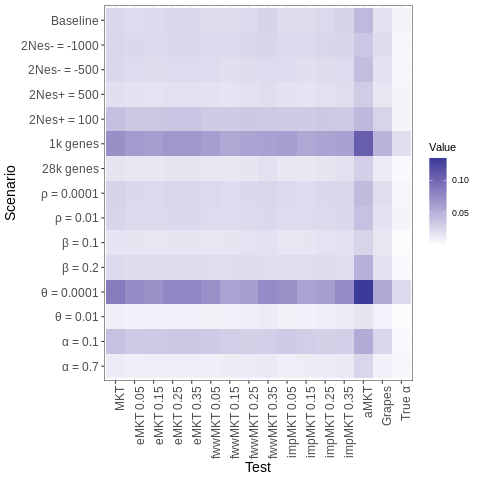

In [23]:
%%R -i mkt_std -i PATH

tmp = as.data.table(mkt_std)
tmp$variable = as.factor(tmp$variable)
tmp$simulation = as.factor(tmp$simulation)

tmp = tmp[variable != 'aMKT_all']
tmp = tmp[simulation != 'base_weakly']
tmp = tmp[simulation != 'base_weakly_bgs']

p3 = ggplot(tmp,aes(x=variable,y=reorder(simulation, desc(simulation)),fill=value)) + geom_tile() + theme_bw() + theme(strip.text=element_text(size=14),axis.text.x = element_text(size=12,angle=90,hjust=1),axis.text.y = element_text(size=12),axis.title=element_text(size=14)) + scale_fill_gradient2(name='Value') + ylab('Scenario') + xlab('Test')


ggsave(paste0(PATH,'/results/simulations/mkt_std.svg'),height=10,width=10)
ggsave(p3,filename=paste0(PATH,'/results/simulations/mkt_std.png'),dpi=300)

p3

### Plot low polymorphic scenarios

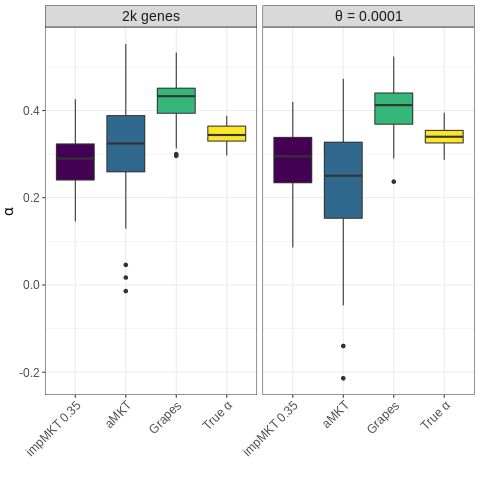

In [24]:
%%R -i data_plot -i PATH

library(ggplot2)
data_plot = as.data.table(data_plot)
data_plot$variable %>% unique

d = data_plot[variable ==  'impMKT 0.35'  | variable=='aMKT' | variable=='Grapes' | variable == 'True α']
d = d[simulation == 'θ = 0.0001' | simulation ==  '2k genes']


p = ggplot(d) + geom_boxplot(aes(x=variable,y=value,fill=variable),show.legend = FALSE) + facet_wrap(~simulation,ncol=12) +  theme_bw() + theme(strip.text=element_text(size=14),axis.text.x = element_text(size=12,angle=45,hjust=1),axis.text.y = element_text(size=12),axis.title=element_text(size=14)) + scale_fill_viridis_d() + ylab(expression(alpha)) + xlab("")

ggsave(p,filename=paste0(PATH,'/results/simulations/low_pol_scenarios.svg'),height=7,width=10,dpi=600)

p

### Weakly selection + BGS

In [25]:
s1 = pd.read_csv(PATH + 'raw_data/simulations/base_weakly/sfs.tsv',sep='\t')
s1['nopos'] = s1.pi - s1.pw
s1 = cumulativeSfs(s1.to_numpy())
d1 = pd.read_csv(PATH + 'raw_data/simulations/base_weakly/div.tsv',sep='\t').to_numpy().flatten()

a1 = pd.DataFrame({'f':np.arange(1,40)/40,'All alleles':amkt(s1,d1)[1],'Neutral + deleterious alleles':amkt(s1[:,[0,4,2]],d1)[1],'Simulation':'Base + weak adapation'})

s2 = pd.read_csv(PATH + 'raw_data/simulations/base_weakly_bgs/sfs.tsv',sep='\t')
s2['nopos'] = s2.pi - s2.pw
s2 = cumulativeSfs(s2.to_numpy())
d2 = pd.read_csv(PATH + 'raw_data/simulations/base_weakly_bgs/div.tsv',sep='\t').to_numpy().flatten()

a2 = pd.DataFrame({'f':np.arange(1,40)/40,'All alleles':amkt(s2,d2)[1],'Neutral + deleterious alleles':amkt(s2[:,[0,4,2]],d2)[1],'Simulation':'Base + weak adapation + BGS'})

df = pd.concat([a2,a1])
df

,f,All alleles,Neutral + deleterious alleles,Simulation
0,0.025,-0.872100,-0.825588,Base + weak adapation + BGS
1,0.050,-0.519110,-0.472094,Base + weak adapation + BGS
2,0.075,-0.353391,-0.308026,Base + weak adapation + BGS
3,0.100,-0.253906,-0.209275,Base + weak adapation + BGS
4,0.125,-0.200166,-0.162066,Base + weak adapation + BGS
...,...,...,...,...
34,0.875,0.245403,0.312778,Base + weak adapation
35,0.900,0.172363,0.260409,Base + weak adapation
36,0.925,0.028597,0.144241,Base + weak adapation
37,0.950,0.191503,0.258878,Base + weak adapation


R[write to console]: Saving 10 x 6.67 in image



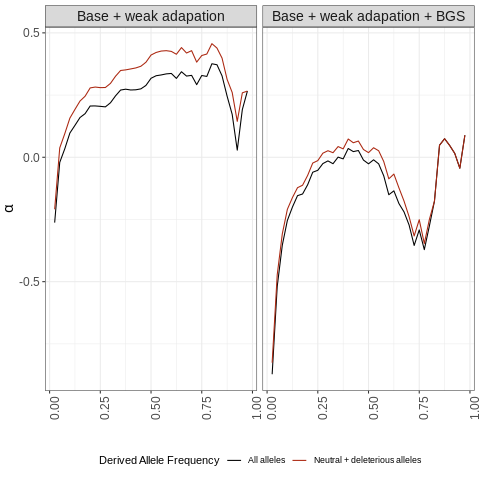

In [26]:
%%R -i df -i PATH

df = as.data.table(df)
d = melt(df,id.vars=c('Simulation','f'))
p = ggplot(d,aes(x=f,y=value,color=variable)) + geom_line() + facet_wrap('~Simulation') + scale_color_manual(values=c("black","#ab2710")) + theme_bw()  + theme(strip.text=element_text(size=14),axis.text.x = element_text(size=12,angle=90,hjust=1),axis.text.y = element_text(size=12),axis.title=element_text(size=14),legend.position = "bottom") + ylab(expression(alpha)) + xlab("") + labs(color='Derived Allele Frequency')
print(p)
ggsave(p,filename=paste0(PATH,'/results/simulations/weakly_alpha.svg'),width=10)

 [1] MKT         eMKT 0.05   eMKT 0.15   eMKT 0.25   eMKT 0.35   fwwMKT 0.05
 [7] fwwMKT 0.15 fwwMKT 0.25 fwwMKT 0.35 impMKT 0.05 impMKT 0.15 impMKT 0.25
[13] impMKT 0.35 <NA>        aMKT        Grapes      True α     
16 Levels: MKT < eMKT 0.05 < eMKT 0.15 < eMKT 0.25 < ... < True α


R[write to console]: Saving 8 x 6.67 in image



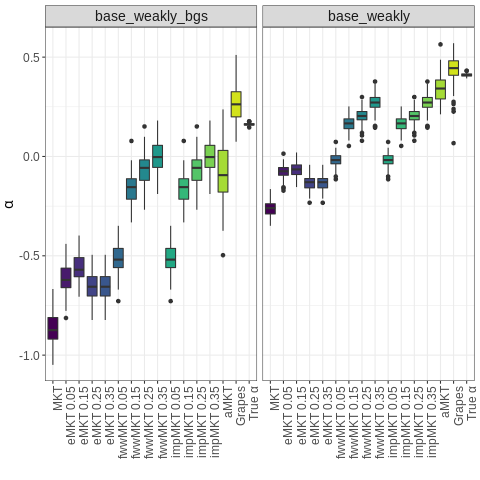

In [27]:
%%R -i data_plot -i PATH

library(ggplot2)
data_plot = as.data.table(data_plot)
data_plot$variable %>% unique
print(data_plot$variable %>% unique)
d = data_plot[variable !=  'asymp1']
d = d[simulation == 'base_weakly' | simulation ==  'base_weakly_bgs']


p = ggplot(d) + geom_boxplot(aes(x=variable,y=value,fill=variable),show.legend = FALSE) + facet_wrap(~simulation,ncol=12) +  theme_bw() + theme(strip.text=element_text(size=14),axis.text.x = element_text(size=12,angle=90,hjust=1),axis.text.y = element_text(size=12),axis.title=element_text(size=14)) + scale_fill_viridis_d() + ylab(expression(alpha)) + xlab("")

ggsave(p,filename=paste0(PATH,'/results/simulations/weakly.svg'),width=8)

p

### Plot heatmap

R[write to console]: Saving 8 x 6.67 in image



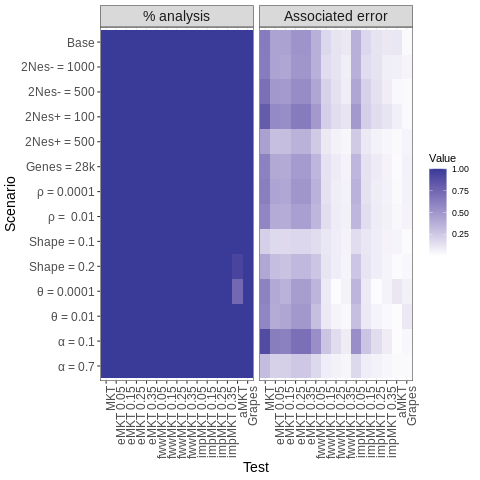

In [34]:
%%R -i df_error -i error_count

df_error = as.data.table(df_error)
df_error = df_error[Simulations!='base_weakly' & Simulations!='base_weakly_bgs']

error_count = as.data.table(error_count)
error_count = error_count[Simulations!='base_weakly' & Simulations!='base_weakly_bgs']

df_error$Simulations = factor(df_error$Simulations,c("Base","2Nes- = 1000","2Nes- = 500","2Nes+ = 100","2Nes+ = 500","Genes = 1k","Genes = 28k","ρ = 0.0001","ρ =  0.01","Shape = 0.1","Shape = 0.2","θ = 0.0001","θ = 0.01","α = 0.1","α = 0.25","α = 0.7"))

d1 = melt(df_error,id.vars='Simulations')

error_count$Simulations = factor(error_count$Simulations,c("Base","2Nes- = 1000","2Nes- = 500","2Nes+ = 100","2Nes+ = 500","Genes = 2k","Genes = 28k","ρ = 0.0001","ρ =  0.01","Shape = 0.1","Shape = 0.2","θ = 0.0001","θ = 0.01","α = 0.1","α = 0.25","α = 0.7"))

d2 = melt(error_count,id.vars='Simulations')

d1$case= 'Associated error'
d2$case= '% analysis'
df = rbind(d1,d2) %>% as.data.table

df = df[Simulations!='α = 0.25']
p1 = ggplot(df,aes(x=variable,y=reorder(Simulations, desc(Simulations)),fill=value)) + geom_tile() + scale_fill_gradient2(name='Value') + xlab('Test')+ ylab('Scenario') + facet_wrap(~ case) + theme_bw() + theme(strip.text=element_text(size=14),axis.text.x = element_text(size=12,angle=90,hjust=1),axis.text.y = element_text(size=12),axis.title=element_text(size=14))

ggsave(p1,filename=paste0(PATH,'/results/simulations/error_heatmap.svg'),width=8)

p1

### DFE

In [29]:
nthreads = 8
df_dfe = []
for s in scenario[0:-2]:
    tmp = parse_dfe(PATH + "/raw_data/simulations/" + s,nthreads=nthreads)
    df_dfe.append(tmp)
df = pd.concat(df_dfe).infer_objects()
df.to_csv(PATH + "results/simulations/dfe.tsv",sep='\t',index=False)

100%|███████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.33it/s]


In [30]:
df.groupby(['analysis','test']).mean().reset_index().to_csv(PATH + 'results/simulations/dfe_mean.tsv',sep='\t')

In [31]:
imp1 = df[df.test == 'imp1'].groupby(['analysis']).mean().reset_index()
imp2 = df[df.test == 'imp2'].groupby(['analysis']).mean().reset_index()
slim = df[df.test == 'slim'].groupby(['analysis']).mean().reset_index()

a = slim.iloc[:,1:] - imp1.iloc[:,1:]
a['analysis'] = slim.iloc[:,0]
a['test'] = "impMK 0.05"
a.iloc[:,0:3] = a.iloc[:,0:3].abs()
b = slim.iloc[:,1:] - imp2.iloc[:,1:]
b['analysis'] = slim.iloc[:,0]
b['test'] = "impMK 0.35"

b.iloc[:,0:3] = b.iloc[:,0:3].abs()
pd.concat([a,b]).to_csv(PATH + "/results/simulations/dfe_mean_error.tsv",sep='\t')

/home/jmurga/.conda/envs/imp/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


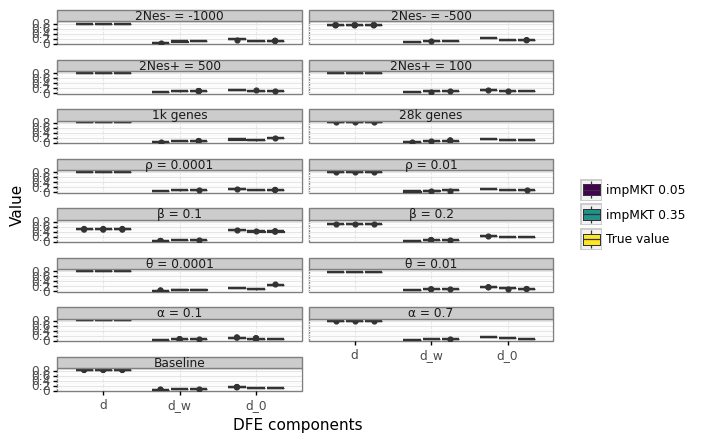

<ggplot: (8751392717966)>

In [32]:
df = pd.read_csv(PATH + "results/simulations/dfe.tsv",sep="\t")
df = pd.melt(df,id_vars=['test','analysis'])

df.test = pd.Categorical(df.test)
df.test = df.test.cat.rename_categories({'imp1':'impMKT 0.05','imp2':'impMKT 0.35','slim':'True value'})
df.variable = pd.Categorical(df.variable,categories=['d','d_w','d_0'],ordered=True)


df.analysis = pd.Categorical(df.analysis,categories=['2nes_neg_1000','2nes_neg_500','2nes_pos_500','2nes_pos_100','genes_1k','genes_28k', 'rho_0.0001','rho_0.01','shape_0.1','shape_0.2','theta_0.0001','theta_0.01', 'alpha_0.1', 'alpha_0.7','alpha_0.25','base'],ordered=True)

df.analysis = df.analysis.cat.rename_categories({'base': 'Baseline','rho_0.01':'ρ = 0.01','rho_0.0001':'ρ = 0.0001','theta_0.01':'θ = 0.01','theta_0.0001':'θ = 0.0001','genes_28k':'28k genes','genes_1k':'1k genes','2nes_pos_500':'2Nes+ = 500','2nes_pos_100':'2Nes+ = 100','2nes_neg_1000':'2Nes- = -1000','2nes_neg_500':'2Nes- = -500','shape_0.1':'β = 0.1','shape_0.2':'β = 0.2','alpha_0.7':'α = 0.7','alpha_0.25':'α = 0.25','alpha_0.1':'α = 0.1'})


p = ggplot(df,aes(x='variable',y='value',fill='test')) + geom_boxplot() + facet_wrap('~analysis',ncol=2) + theme_bw() + ylab('Value') + xlab('DFE components') + scale_fill_cmap_d('viridis') + guides(fill=guide_legend(title=""))

p

In [33]:
ggsave(p,filename=PATH + "results/simulations/dfe.svg",height=10,width=6)

/home/jmurga/.conda/envs/imp/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 10 in image.
/home/jmurga/.conda/envs/imp/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/jmurga/mkt/201902/results/simulations/dfe.svg
/home/jmurga/.conda/envs/imp/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
